In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv = pd.read_csv("fine_tuning_datasets.csv")
loso_csv = pd.read_csv("loso_datasets_data.csv")
indiv_csv = pd.read_csv("indiv_datasets_data.csv")


# List the keys in the csv file
print(loso_csv.keys())

Index(['Id', 'Creation Time', 'training/val_acc_epoch (max)', 'Tags',
       'Val acc (last)', 'Window (s) (last)', 'hidden_size (last)',
       'Monitoring Time', 'metadata/occlusion (average)', 'Epoch (last)',
       'metadata/lstm_layers (last)', 'metadata/stride (average)',
       'metadata/seed (average)', 'metadata/file_path',
       'metadata/val_set_length (average)', 'metadata/train_set_length (last)',
       'training/val_acc_epoch (variance)'],
      dtype='object')


In [3]:
ft1 = csv[csv["metadata/train_set_length (min)"] == 14360]
ft2 = csv[csv["metadata/train_set_length (min)"] == 895]
ft3 = csv[csv["metadata/train_set_length (min)"] == 355]
ft4 = csv[csv["metadata/train_set_length (min)"] == 175]
ft5 = csv[csv["metadata/train_set_length (min)"] == 85]


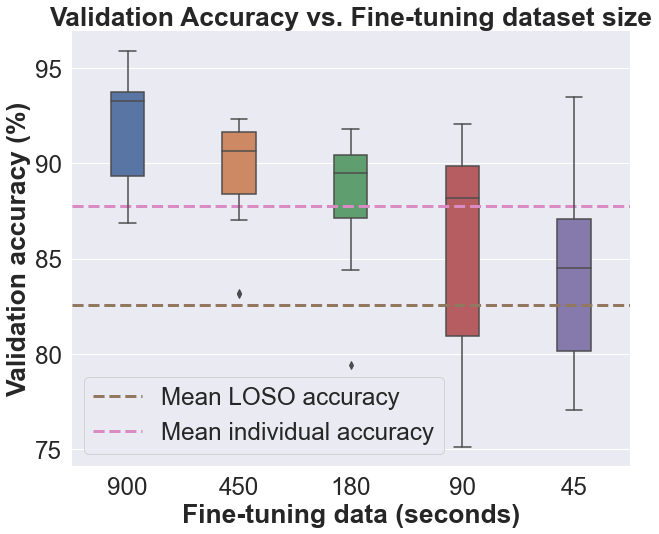

In [4]:
sns.set_theme(style="darkgrid", palette="deep")

# Plot the boxplot
# Set the figure size
plt.figure(figsize=(10, 8))
sns.set(font_scale=2.2)

# Add horizontal lines for the accuracy of the loso and indiv datasets with color from the seaborn palette "deep" thickened

plt.axhline(y=loso_csv["Val acc (last)"].mean()*100, linestyle="--",color=sns.color_palette("deep")[5], label="Mean LOSO accuracy", linewidth=3)
plt.axhline(y=indiv_csv["Val acc (last)"].mean()*100, linestyle="--",color=sns.color_palette("deep")[6], label="Mean individual accuracy", linewidth=3)



# Create the boxplot
sns.boxplot([ft1['Val acc (last)']*100, ft2['Val acc (last)']*100, ft3['Val acc (last)']*100, ft4['Val acc (last)']*100, ft5['Val acc (last)']*100], width=0.3)
sns.despine(left=True)

plt.xticks([0, 1, 2, 3, 4], ['900', '450', '180', '90', '45'])

# Legend
plt.legend(loc="best")


# Add title and axis names
plt.title('Validation Accuracy vs. Fine-tuning dataset size',fontweight="bold")
plt.xlabel('Fine-tuning data (seconds)',fontweight="bold")
plt.ylabel('Validation accuracy (%)',fontweight="bold")

plt.savefig('ft_size.png', dpi=300,bbox_inches='tight')

plt.show()
